# Problem statement: Early detection of diabetics risk

    * The goal of the project is to use historical data to detect if a patient is likely to be at risk of diabetes or not. So, our target variable will be the outcome, while the other features will be the input features. This will be a supervised learning and classification task.

In [1]:
# Import necessary libraries
import pickle
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

sns.set()

In [2]:
# Load sample data
df = pd.read_csv('https://github.com/johnola/Computational-Software-Eng/blob/main/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### EDA - Exploratory Data Analysis

##### Uni-variate Analysis

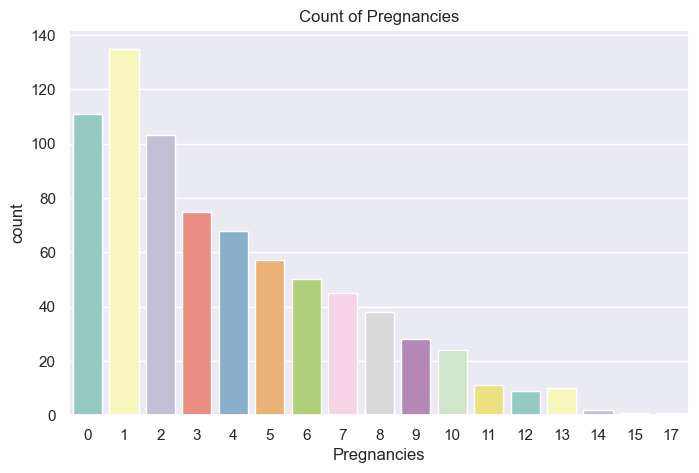

In [6]:
# Pregnancies
plt.figure(figsize=(8, 5))
sns.countplot(x='Pregnancies', data=df, palette='Set3')
plt.title("Count of Pregnancies")
plt.show()

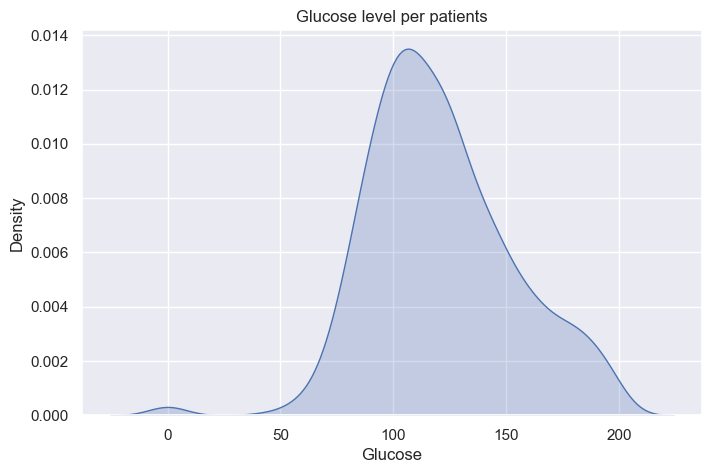

In [7]:
# Glucose
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df['Glucose'], fill=True)
plt.title("Glucose level per patients")
plt.xlabel("Glucose")
plt.ylabel('Density')
plt.show()

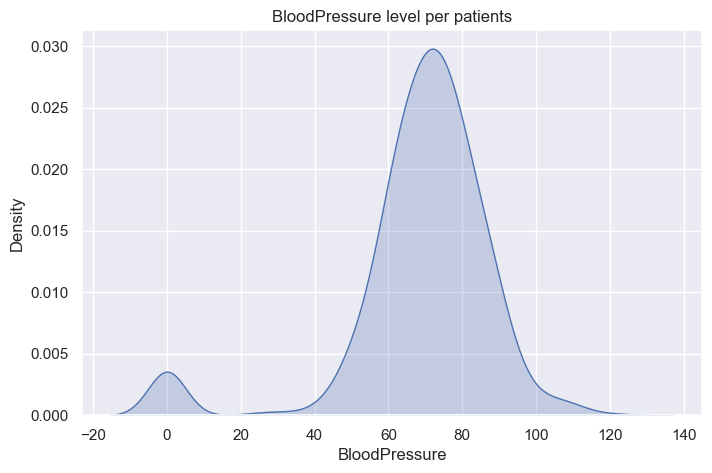

In [8]:
# BloodPressure
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df['BloodPressure'], fill=True)
plt.title("BloodPressure level per patients")
plt.xlabel("BloodPressure")
plt.ylabel('Density')
plt.show()

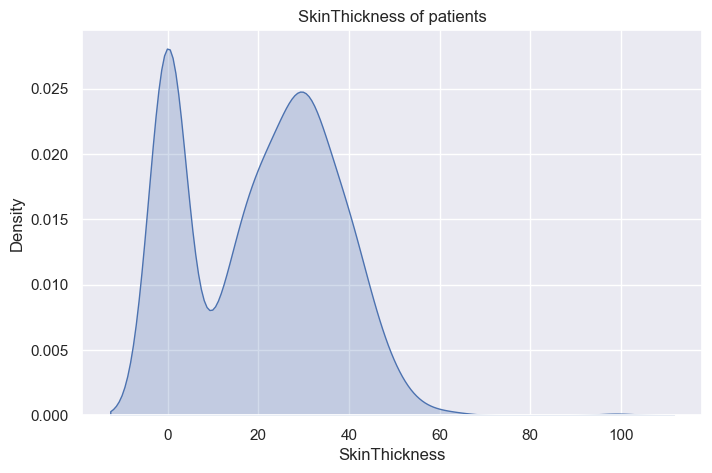

In [9]:
# SkinThickness
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df['SkinThickness'], fill=True)
plt.title("SkinThickness of patients")
plt.xlabel("SkinThickness")
plt.ylabel('Density')
plt.show()

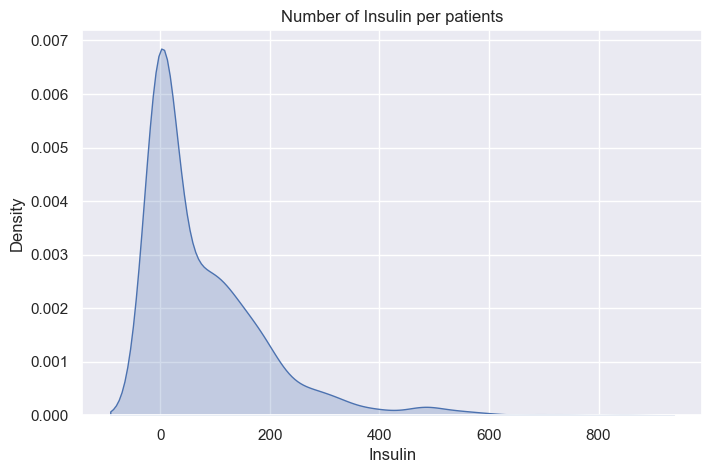

In [10]:
# Insulin
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df['Insulin'], fill=True)
plt.title("Number of Insulin per patients")
plt.xlabel("Insulin")
plt.ylabel('Density')
plt.show()

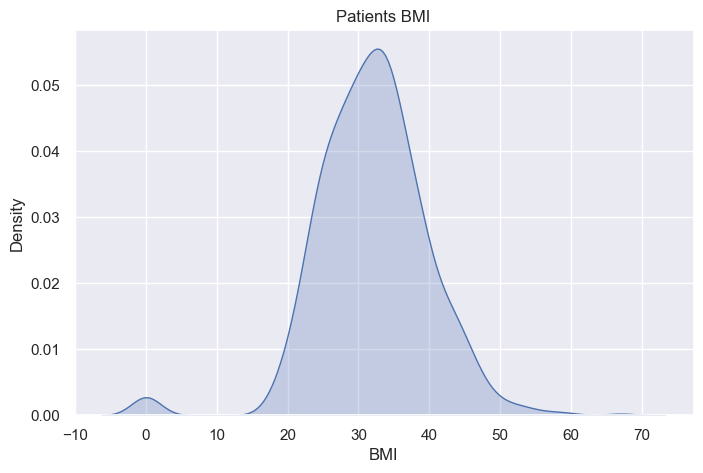

In [11]:
# BMI
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df['BMI'], fill=True)
plt.title("Patients BMI")
plt.xlabel("BMI")
plt.ylabel('Density')
plt.show()

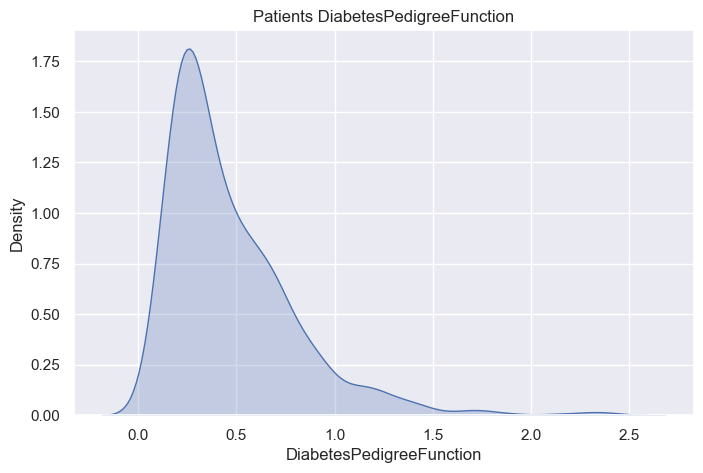

In [12]:
# DiabetesPedigreeFunction
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df['DiabetesPedigreeFunction'], fill=True)
plt.title("Patients DiabetesPedigreeFunction")
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel('Density')
plt.show()

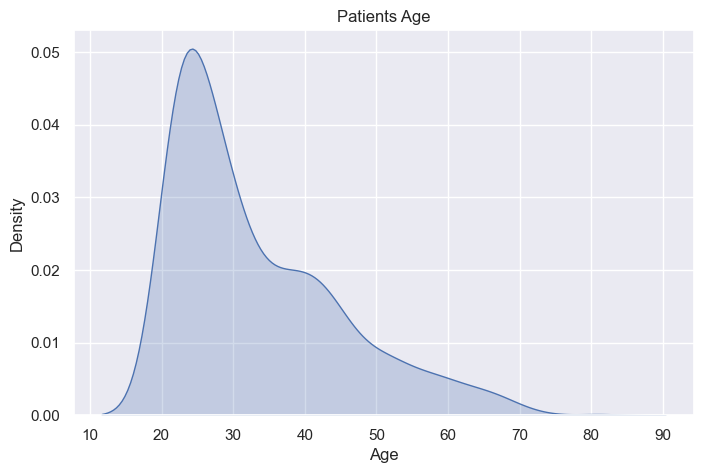

In [13]:
# Age
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df['Age'], fill=True)
plt.title("Patients Age")
plt.xlabel("Age")
plt.ylabel('Density')
plt.show()

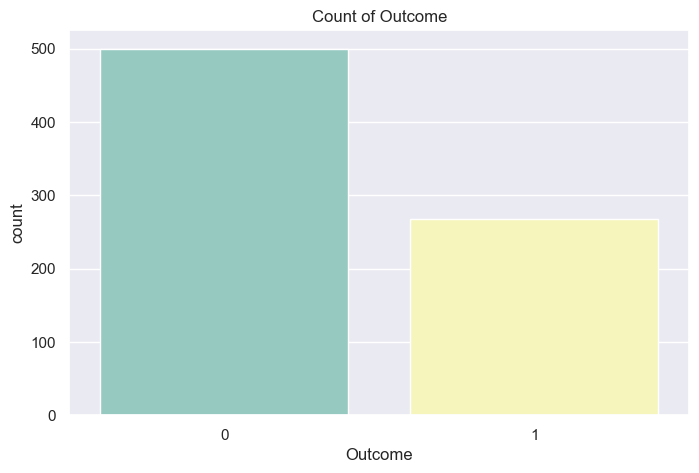

In [14]:
# Outcome
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=df, palette='Set3')
plt.title("Count of Outcome")
plt.show()

##### Bi-variate analysis

<Figure size 1000x600 with 0 Axes>

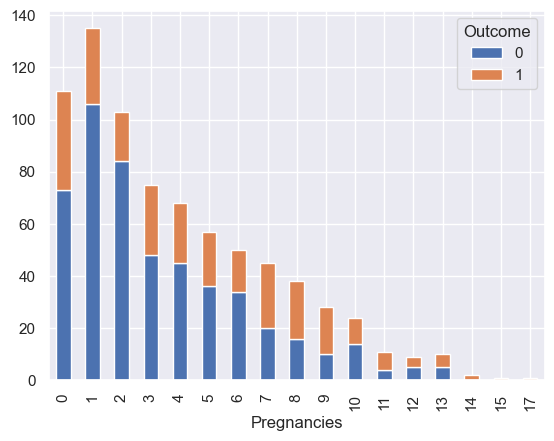

In [15]:
# Outcome vs Pregnancies
plt.figure(figsize=(10, 6))
df.groupby(['Pregnancies', 'Outcome']).size().unstack().plot(kind='bar', stacked=True);
plt.show()

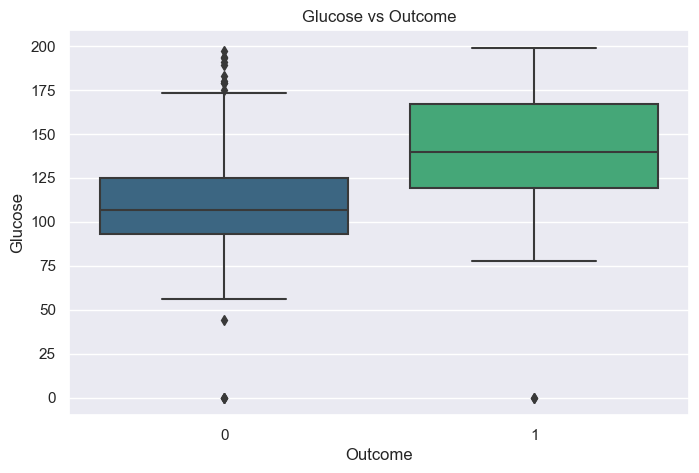

In [16]:
# Outcome vs Glucose
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='viridis')
plt.title("Glucose vs Outcome")
plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.show()

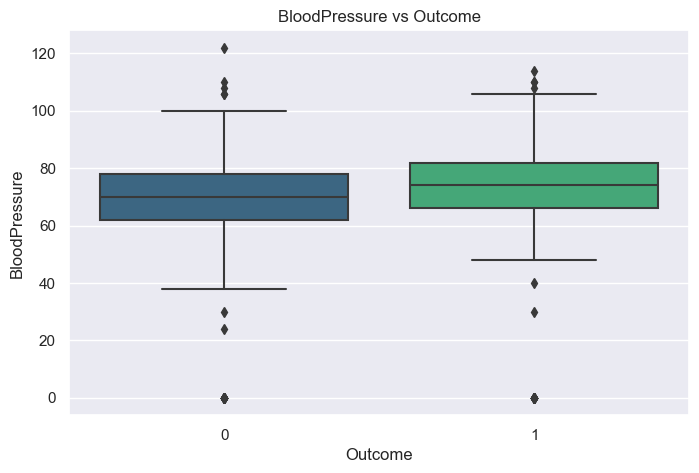

In [17]:
# Outcome vs BloodPressure
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df, palette='viridis')
plt.title("BloodPressure vs Outcome")
plt.xlabel("Outcome")
plt.ylabel("BloodPressure")
plt.show()

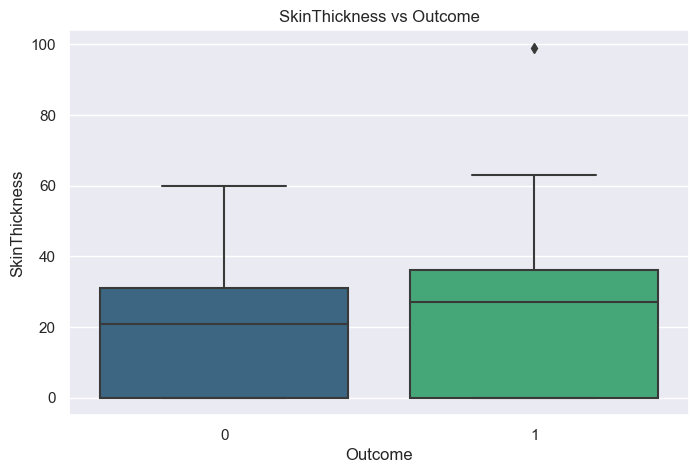

In [18]:
# Outcome vs SkinThickness
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='SkinThickness', data=df, palette='viridis')
plt.title("SkinThickness vs Outcome")
plt.xlabel("Outcome")
plt.ylabel("SkinThickness")
plt.show()

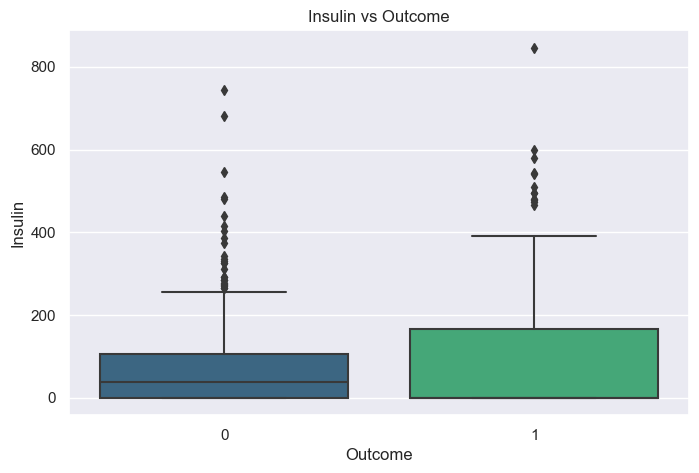

In [19]:
# Outcome vs Insulin
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Insulin', data=df, palette='viridis')
plt.title("Insulin vs Outcome")
plt.xlabel("Outcome")
plt.ylabel("Insulin")
plt.show()

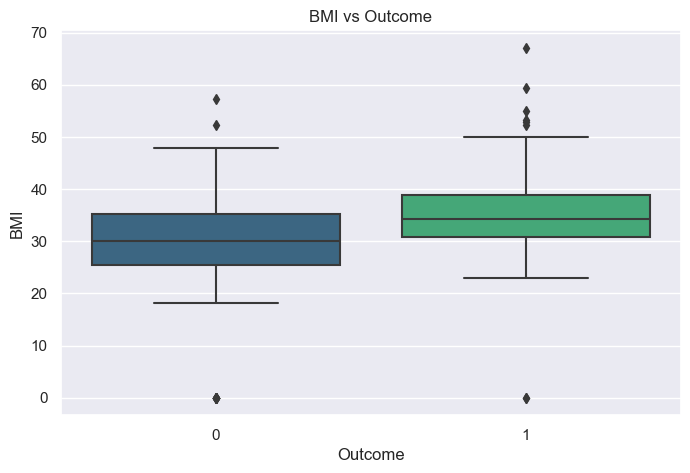

In [20]:
# Outcome vs BMI
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='BMI', data=df, palette='viridis')
plt.title("BMI vs Outcome")
plt.xlabel("Outcome")
plt.ylabel("BMI")
plt.show()

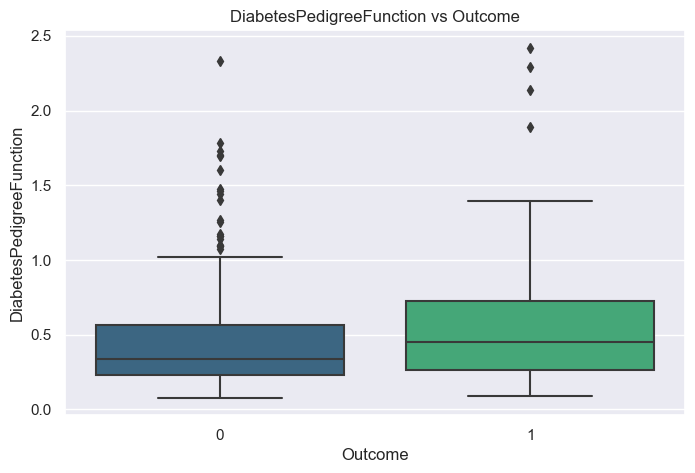

In [21]:
# Outcome vs DiabetesPedigreeFunction
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, palette='viridis')
plt.title("DiabetesPedigreeFunction vs Outcome")
plt.xlabel("Outcome")
plt.ylabel("DiabetesPedigreeFunction")
plt.show()

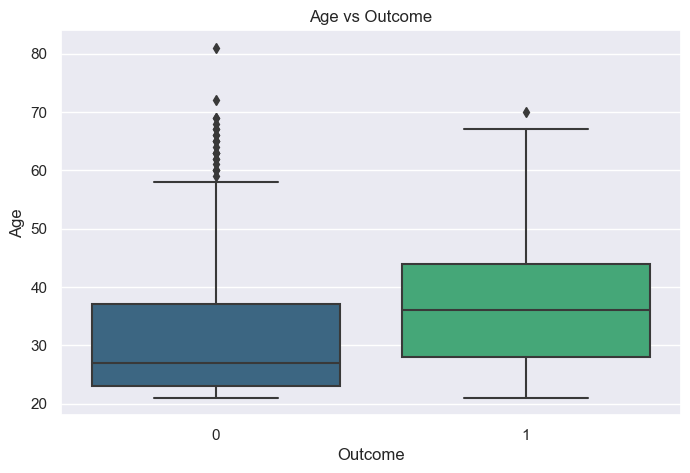

In [22]:
# Outcome vs Age
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Age', data=df, palette='viridis')
plt.title("Age vs Outcome")
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.show()

### Data Pre-processing Phase

In [23]:
# Shuffle our data
df = shuffle(df, random_state=42)

In [24]:
# Handling outliers
outliers_cols = ['Insulin']
# Boxplot approach 
for col in outliers_cols:
    lower_quartile = df[col].quantile(0.25)
    upper_quartile = df[col].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 2   # By default we use have use 1.5 but to avoid dropping huge ddata we have decided to use 2
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    outliers = df[(df[col] < min_border) | (df[col] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {col}")
    
    df.drop(outliers, inplace=True)

22 outliers detected in column Insulin


In [25]:
df.shape

(746, 9)

In [26]:
# Split Input and Output variables
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Optimal number of features: 8


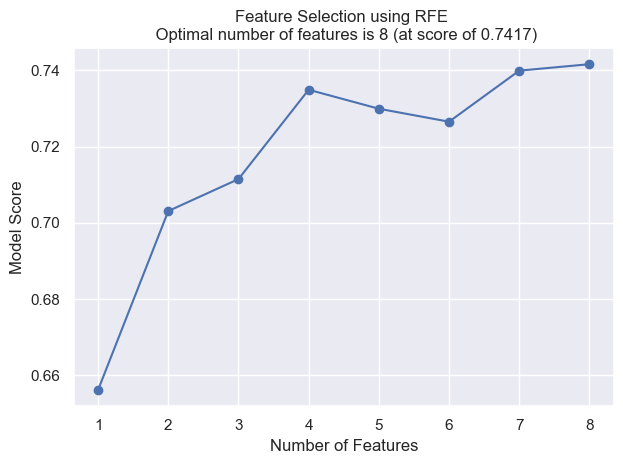

In [28]:
# Feature selection with RFECV
clf = RandomForestClassifier(random_state=42) 
feature_selector = RFECV(clf)
fit = feature_selector.fit(X_train, y_train)
optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")
X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]
plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout()
plt.show()

### Modeling Phase

In [29]:
# Create models
lg_classifier = LogisticRegression(random_state=42, max_iter=1000)
rf_classifier = RandomForestClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)

In [30]:
models = [lg_classifier, rf_classifier, dt_classifier, gb_classifier]
model_names = ['LogisticRegression', 'RandomForest', 'DecisionTree', 'GradientBoosting']

In [31]:
# Initialize lists to store results
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate through models
for model, name in zip(models, model_names):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

In [32]:
# Create a DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Sort the DataFrame by F1 Score in ascending order
results_df = results_df.sort_values(by='F1 Score', ascending=False)

In [33]:
results_df

,Model,Precision,Recall,F1 Score
1,RandomForest,0.815789,0.607843,0.696629
3,GradientBoosting,0.775000,0.607843,0.681319
0,LogisticRegression,0.866667,0.509804,0.641975
2,DecisionTree,0.666667,0.588235,0.625000


In [34]:
# Define the parameter grid for GridSearchCV
param_dist = {
    'n_estimators': np.arange(50, 501, 50),
    'max_depth': np.arange(2, 9, 1),
    'min_samples_split': np.arange(2, 9, 1),
    'min_samples_leaf': np.arange(1, 5, 1)
}

# Create GridSearchCV object
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10,
                                   cv=5, scoring='f1', random_state=42, n_jobs=-1)

# Fit the GridSearchCV object to the data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   random_state=42, scoring='f1')

In [35]:
# Get the best model
best_rf_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(random_search.best_params_)

# Make predictions using the best model
y_pred_best = best_rf_model.predict(X_test)

# Calculate and print the F1 score of the best model
f1_best_model = f1_score(y_test, y_pred_best)
print(f"F1 Score of the Best Model: {f1_best_model}")

Best Hyperparameters:
{'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 8}
F1 Score of the Best Model: 0.7126436781609194


### Evaluation Phase 

C:\Users\ynkpr\AppData\Local\Temp\ipykernel_18476\1921124652.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


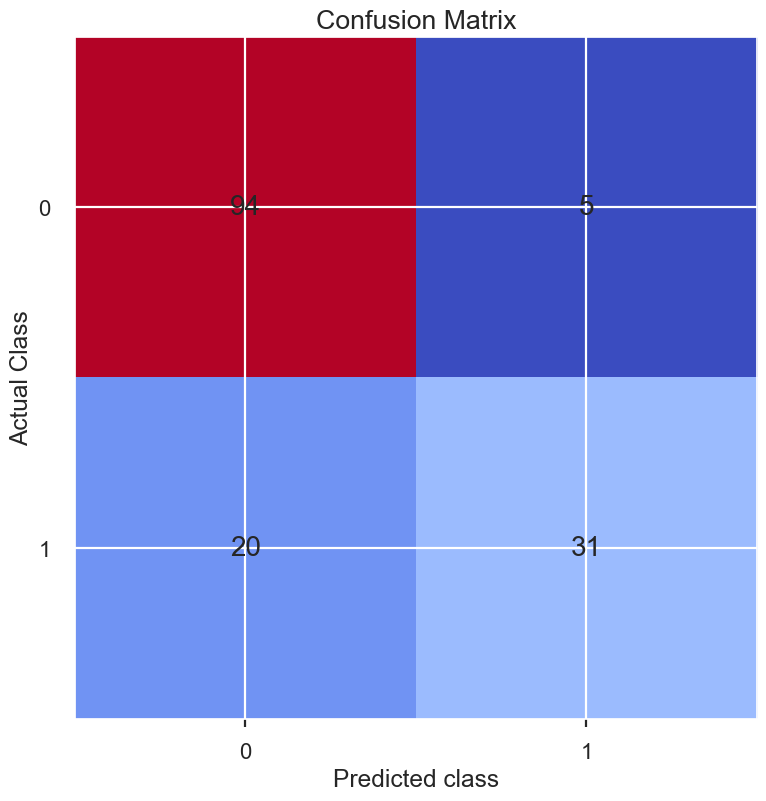

In [36]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.style.use('seaborn-poster')
plt.matshow(conf_matrix, cmap='coolwarm')
plt.gca().xaxis.tick_bottom()
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted class')
for (i, j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j, i, corr_value, ha='center', va='center', fontsize=20)
plt.show()

In [37]:
# Accuracy score: (The number of correct classification out of all attempted classifications)
accuracy_score(y_test, y_pred_best)

0.8333333333333334

In [38]:
# Precision: (Of all observations that was predicted positive =, how many were actually positive)
precision_score(y_test, y_pred_best)

0.8611111111111112

In [39]:
# Recall : (Of all positive observations, how many did we predict as positive)
recall_score(y_test, y_pred_best)

0.6078431372549019

In [40]:
# F1-Score (The harmonic mean of precision and recall)
f1_score(y_test, y_pred_best)

0.7126436781609194

##### Feature Importances

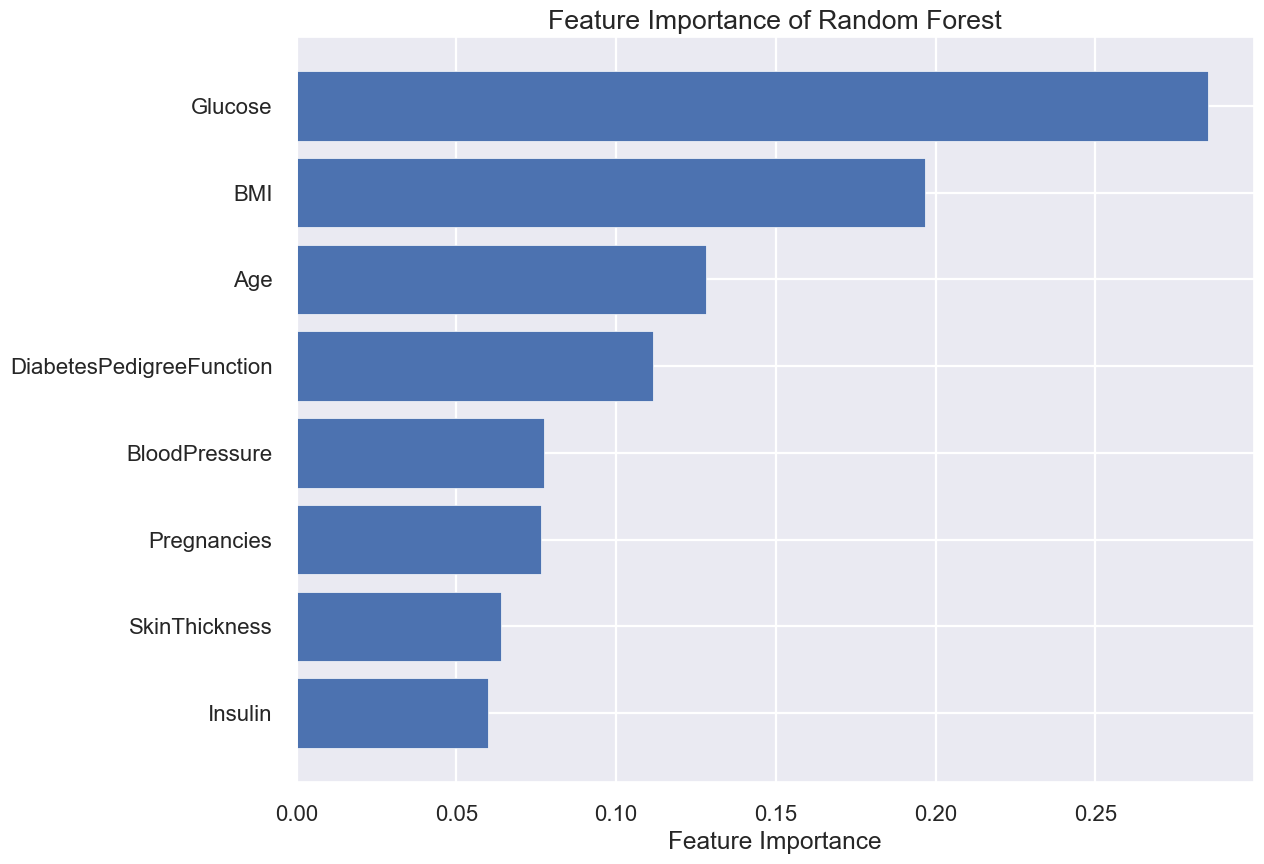

In [41]:
# Feature Importance
feature_importance = pd.DataFrame(best_rf_model.feature_importances_)
feature_names = pd.DataFrame(X_train.columns)
feature_importance_summary = pd.concat([feature_names, feature_importance], axis=1)
feature_importance_summary.columns = ['input_variable', 'feature_importance']
feature_importance_summary.sort_values(by = 'feature_importance', inplace=True)
plt.barh(feature_importance_summary['input_variable'], feature_importance_summary['feature_importance'])
plt.title('Feature Importance of Random Forest')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

### Save our model

In [42]:
# Save the model and model objects with Pickle
pickle.dump(best_rf_model, open('best_clf_pima_diabetics.pkl', 'wb'))